# Nuwefruit - Data Scientist challenge

Event: 4YFN Hackathon – MWC Barcelona 2022 (online phase)

Author: [Sergi Salido](https://github.com/SergiSalido)

Date: 2022-02-13

This Jupyter Notebook contains the code with which I have made the EDA and the predictive model. It can be executed in a [Google Colab](https://colab.research.google.com).

## Table of contents
<nav>

* [Import libraries](#import_libraries)
* [Import datasets and data preprocessing](#import_data)
* [Task 1: EDA](#task1)
* [Task 2: Pedictive model](#task2)
</nav>

<a id="import_libraries"></a>
## Import libraries

In [463]:
# Importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline 
sns.set(color_codes=True)

<a id="import_data"></a>
## Import datasets and data preprocessing

### Client dataset

In [39]:
# Read the client dataset
client_df = pd.read_csv("https://raw.githubusercontent.com/SergiSalido/BDT_MWC22_data_scientist_challenge/main/datasets/mwc22-client_table.csv")
# Convert AVG CONSO and AVG BASKET SIZE from string columns to float
client_df["AVG CONSO"] = client_df["AVG CONSO"].str.replace(',', '.').astype(float)
client_df["AVG BASKET SIZE"] = client_df["AVG BASKET SIZE"].str.replace(',', '.').astype(float)
client_df.head()

CLIENT ID  CLIENT_SEGMENT  ...  AVG BASKET SIZE  RECEIVED_COMMUNICATION
0   24321771               6  ...           201.75                       0
1   24321859               2  ...           350.00                       0
2   24321880               3  ...           112.00                       0
3   24321957               2  ...           600.00                       0
4   24321962               4  ...           120.00                       0

[5 rows x 5 columns]

In [69]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLIENT ID               35884 non-null  int64  
 1   CLIENT_SEGMENT          35884 non-null  int64  
 2   AVG CONSO               35884 non-null  float64
 3   AVG BASKET SIZE         35884 non-null  float64
 4   RECEIVED_COMMUNICATION  35884 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


In [71]:
client_df.nunique()

CLIENT ID                 35884
CLIENT_SEGMENT                6
AVG CONSO                  1494
AVG BASKET SIZE            3974
RECEIVED_COMMUNICATION        2
dtype: int64

In [65]:
client_df.describe()

CLIENT ID  CLIENT_SEGMENT  ...  AVG BASKET SIZE  RECEIVED_COMMUNICATION
count  3.588400e+04    35884.000000  ...     35884.000000            35884.000000
mean   2.706058e+07        3.123593  ...       181.218610                0.507998
std    8.835076e+06        1.512932  ...       129.604691                0.499943
min    1.807311e+07        1.000000  ...        10.000000                0.000000
25%    2.053311e+07        2.000000  ...       100.000000                0.000000
50%    2.462190e+07        3.000000  ...       160.000000                1.000000
75%    3.298538e+07        4.000000  ...       225.000000                1.000000
max    4.836594e+07        6.000000  ...      3400.200000                1.000000

[8 rows x 5 columns]

### Orders dataset

In [41]:
# Read the orders dataset
orders_df = pd.read_csv("https://raw.githubusercontent.com/SergiSalido/BDT_MWC22_data_scientist_challenge/main/datasets/mwc22-orders_table.csv")
orders_df.head()

CLIENT ID  NB PRODS   ORDER ID FRUIT_PRODUCT
0   18070505         5  671907264         Apple
1   18070505        10  671907264        Orange
2   18070505         5  671907264          Kiwi
3   18070505        10  671907264          Pear
4   18070505         5  671907264        Cheery

In [42]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66912 entries, 0 to 66911
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CLIENT ID      66912 non-null  int64 
 1   NB PRODS       66912 non-null  int64 
 2   ORDER ID       66912 non-null  int64 
 3   FRUIT_PRODUCT  66912 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


In [72]:
orders_df.nunique()

CLIENT ID        14499
NB PRODS            82
ORDER ID         17458
FRUIT_PRODUCT       24
dtype: int64

In [70]:
orders_df.describe()

CLIENT ID      NB PRODS      ORDER ID
count  6.691200e+04  66912.000000  6.691200e+04
mean   2.613407e+07      4.528112  6.722533e+08
std    8.473596e+06      5.788227  3.205826e+06
min    1.807050e+07    -80.000000  6.638335e+08
25%    2.017427e+07      1.000000  6.694803e+08
50%    2.438055e+07      3.000000  6.719971e+08
75%    2.538708e+07      5.000000  6.750893e+08
max    4.836586e+07    198.000000  6.832132e+08

### Test dataset

In [43]:
# Read the test_x dataset
test_x_df = pd.read_csv("https://raw.githubusercontent.com/SergiSalido/BDT_MWC22_data_scientist_challenge/main/datasets/mwc22-client_table%2B-%2Btest_x.csv")
# Convert AVG CONSO and AVG BASKET SIZE from string columns to float
test_x_df["AVG CONSO"] = test_x_df["AVG CONSO"].str.replace(',', '.').astype(float)
test_x_df["AVG BASKET SIZE"] = test_x_df["AVG BASKET SIZE"].str.replace(',', '.').astype(float)
print(test_x_df.head())

   CLIENT ID  AVG CONSO  AVG BASKET SIZE  RECEIVED_COMMUNICATION
0   48352078       8.33           100.00                       0
1   18072186      93.42           186.83                       1
2   48352246      45.83           137.50                       0
3   18070621      16.67           200.00                       1
4   48352262      13.33           160.00                       0


<a id="task1"></a>
## Task 1: EDA

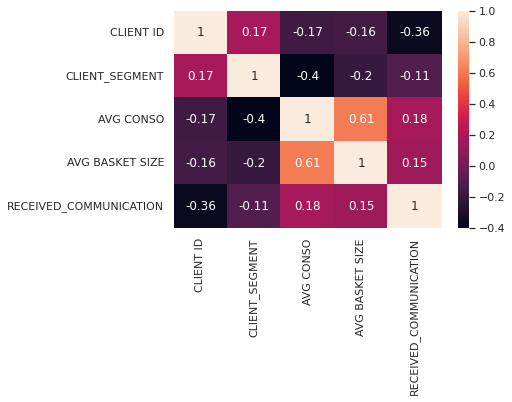

In [76]:
# Check client dataset correlation with heatmap graph
corr = client_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True)

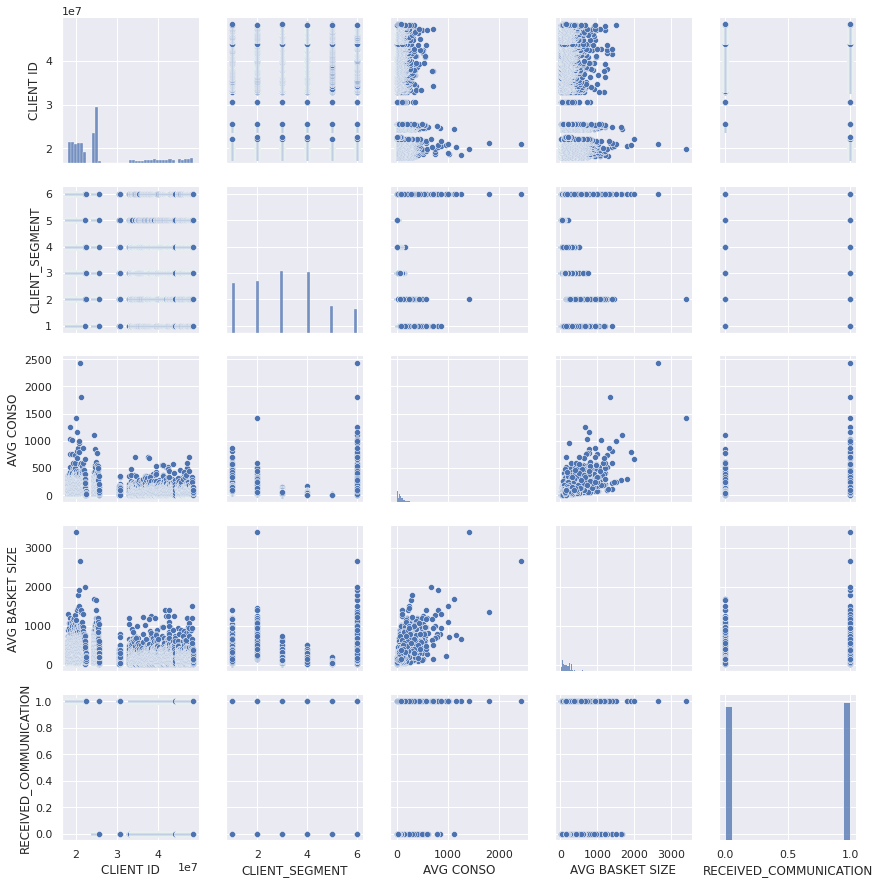

In [78]:
# Plot pairwise relationships in client_df dataset
sns.pairplot(client_df)

In [ ]:
sns.replot(x='', y='', hue='')

In [28]:
# Scatter matrix of client dataset
fig = px.scatter_matrix(
    client_df,
    dimensions=['CLIENT ID','CLIENT_SEGMENT','AVG CONSO','AVG BASKET SIZE', 'RECEIVED_COMMUNICATION'],
    color='CLIENT_SEGMENT'
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [31]:
# Principal Component Analysis
pca = PCA(n_components=3)
components = pca.fit_transform(client_df[['CLIENT_SEGMENT','AVG CONSO','AVG BASKET SIZE', 'RECEIVED_COMMUNICATION']])

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=client_df['CLIENT_SEGMENT'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [64]:
print('Number of clients by CLIENT_SEGMENT:')
print(client_df['CLIENT_SEGMENT'].value_counts())

print('Number of clients by RECEIVED_COMMUNICATION:')
print(client_df['RECEIVED_COMMUNICATION'].value_counts())

Number of clients by CLIENT_SEGMENT:
3    8123
4    7927
2    6760
1    6505
5    3429
6    3140
Name: CLIENT_SEGMENT, dtype: int64
Number of clients by RECEIVED_COMMUNICATION:
1    18229
0    17655
Name: RECEIVED_COMMUNICATION, dtype: int64


In [87]:
fig = px.histogram(client_df, x="CLIENT_SEGMENT", title='Histogram of CLIENT_SEGMENT')
fig.update_layout(bargap=0.2)
fig.show()

In [129]:
fig = px.histogram(client_df, x="CLIENT ID", color='RECEIVED_COMMUNICATION')
fig.update_layout(bargap=0.2)
fig.show()

### Analysis of sales and customer activity

In [82]:
print('Average monthly consumption of customers (in pieces of fruit): ', client_df['AVG CONSO'].mean())

print('Average size of the customer\'s basket (in pieces of fruit): ', client_df['AVG BASKET SIZE'].mean())

Average monthly consumption of customers (in pieces of fruit):  64.53443679634394
Average size of the customer's basket (in pieces of fruit):  181.21860968676924


In [103]:
fig = px.histogram(client_df, x="AVG CONSO", nbins=200, title='Histogram of AVG CONSO')
fig.update_layout(bargap=0.2)
fig.show()

In [102]:
fig = px.histogram(client_df, x="AVG BASKET SIZE", nbins=200, title='Histogram of AVG BASKET SIZE')
fig.update_layout(bargap=0.2)
fig.show()

In [109]:
fig = px.scatter(client_df, x="AVG CONSO", y="AVG BASKET SIZE")
fig.show()

In [110]:
fig = px.scatter(client_df, x="AVG CONSO", y="AVG BASKET SIZE", color="CLIENT_SEGMENT")
fig.show()

In [232]:
print('Number of customers in the client database: ', client_df["CLIENT ID"].nunique())
print('Number of customers who have placed orders: ', orders_df["CLIENT ID"].nunique())

print('Number of orders: ', orders_df["ORDER ID"].nunique())
print('Number of \'prods\' (1 prod = 10 pieces of fruit) ordered: ', orders_df["NB PRODS"].sum())
print('Number of pieces of fruit ordered: ', orders_df["NB PRODS"].sum()*10)


Number of customers in the client database:  35884
Number of customers who have placed orders:  14499
Number of orders:  17458
Number of 'prods' (1 prod = 10 pieces of fruit) ordered:  302985
Number of pieces of fruit ordered:  3029850


In [262]:
print('Number of products ordered by type of fruit:')
prods_sum_by_fruit = orders_df.groupby('FRUIT_PRODUCT')['NB PRODS'].sum().sort_values(ascending=True)
prods_sum_by_fruit.to_frame()

Number of products ordered by type of fruit:


NB PRODS
FRUIT_PRODUCT          
Jackfruit          2339
Melon              3403
Plum               3826
Pineapple          3873
Watermelon         4296
Blueberry          4523
Pomegranate        4945
Mango              5187
Lime               5881
Devil Fruit        6071
Strawberry         6269
Grape              6581
Apple              6637
Papaya             8286
Apricot            9774
Coconut           11862
Banana            17662
Nectarine         18934
Nuwe Fruit        19846
Pear              22776
Cheery            26797
Orange            33145
Lemon             34061
Kiwi              36011

In [263]:
fig = px.bar(prods_sum_by_fruit, x='NB PRODS', title="Total NB PRODS by FRUIT_PRODUCT", text_auto=True)
fig.show()

In [278]:
print('Number of orders by client:')
orders_count_by_client = orders_df.groupby('CLIENT ID')['ORDER ID'].count().sort_values(ascending=False)
orders_count_by_client = pd.DataFrame({'CLIENT ID':orders_count_by_client.index, 'NB ORDERS':orders_count_by_client.values})
orders_count_by_client

Number of orders by client:


CLIENT ID  NB ORDERS
0       18851598         77
1       34351299         50
2       20042062         49
3       20254867         49
4       21000466         45
...          ...        ...
14494   41486943          1
14495   19485150          1
14496   41468283          1
14497   25234522          1
14498   25453195          1

[14499 rows x 2 columns]

In [288]:
fig = px.histogram(orders_count_by_client, x='NB ORDERS', title='Number of customers by NB ORDERS')
fig.update_layout(bargap=0.2)
fig.show()

### Evaluation of the impact of the promotion

In [301]:
# Inner join on the client and orders dataframes on the CLIENT ID column
inner_join_df = pd.merge(client_df, orders_df, on='CLIENT ID', how='inner')
inner_join_df

CLIENT ID  CLIENT_SEGMENT  AVG CONSO  ...  NB PRODS   ORDER ID  FRUIT_PRODUCT
0       24321771               6      67.25  ...         2  676480593          Lemon
1       24321880               3      46.67  ...        10  668762140         Orange
2       24321957               2      50.00  ...        20  667332821        Apricot
3       24321957               2      50.00  ...        20  667332821         Orange
4       24322170               1     116.67  ...         5  668261888          Lemon
...          ...             ...        ...  ...       ...        ...            ...
66867   48335525               3      50.00  ...        10  670782454         Cheery
66868   48365750               3      41.67  ...         1  670187349         Papaya
66869   48365750               3      41.67  ...         9  670187349          Lemon
66870   48365861               3      62.58  ...        10  668693229      Nectarine
66871   48365861               3      62.58  ...         5  668693229          Lemon

[66872 rows x 8 columns]

In [307]:
inner_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66872 entries, 0 to 66871
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLIENT ID               66872 non-null  int64  
 1   CLIENT_SEGMENT          66872 non-null  int64  
 2   AVG CONSO               66872 non-null  float64
 3   AVG BASKET SIZE         66872 non-null  float64
 4   RECEIVED_COMMUNICATION  66872 non-null  int64  
 5   NB PRODS                66872 non-null  int64  
 6   ORDER ID                66872 non-null  int64  
 7   FRUIT_PRODUCT           66872 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 6.6+ MB


In [302]:
inner_join_df.nunique()

CLIENT ID                 14492
CLIENT_SEGMENT                6
AVG CONSO                  1266
AVG BASKET SIZE            3224
RECEIVED_COMMUNICATION        2
NB PRODS                     82
ORDER ID                  17450
FRUIT_PRODUCT                24
dtype: int64

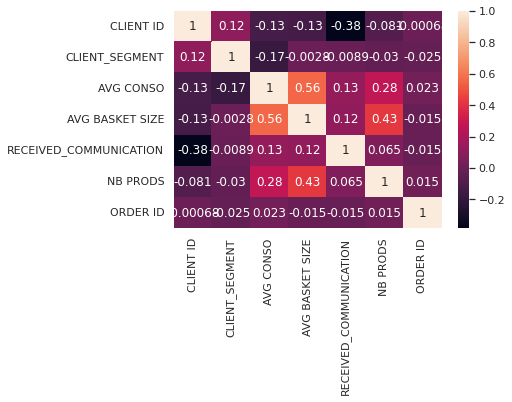

In [303]:
# Check inner_join_df dataset correlation with heatmap graph
corr = inner_join_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True)

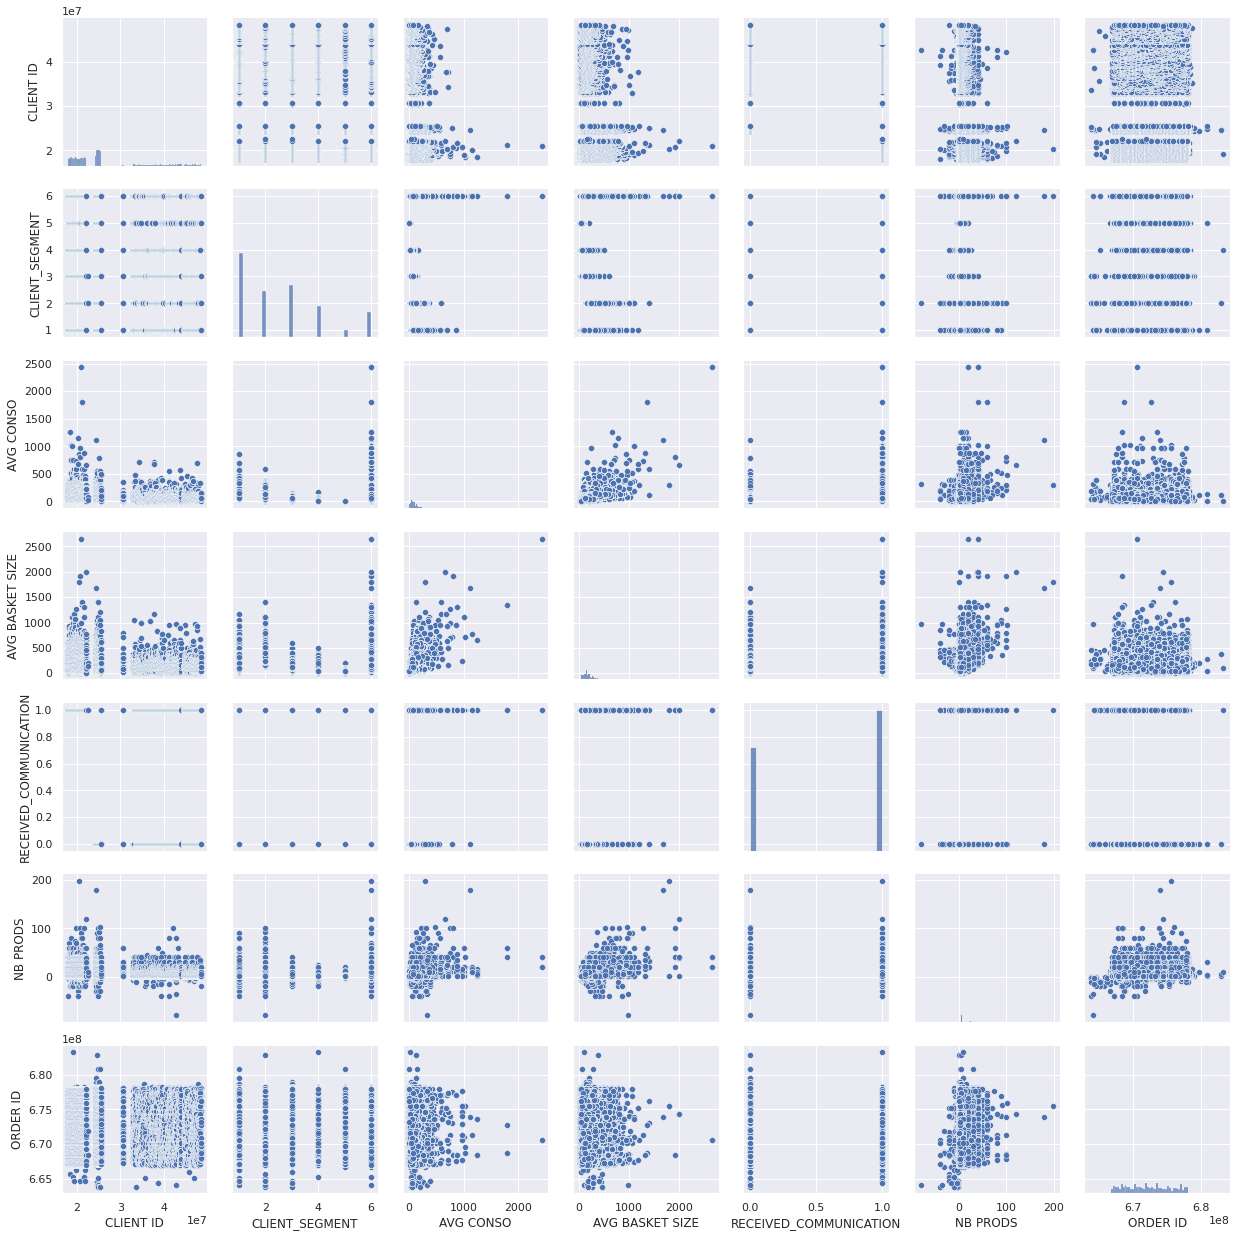

In [305]:
# Plot pairwise relationships in inner_join_df dataset
sns.pairplot(inner_join_df)

In [315]:
inner_join_df[['RECEIVED_COMMUNICATION', 'ORDER ID']].nunique()

RECEIVED_COMMUNICATION        2
ORDER ID                  17450
dtype: int64

In [331]:
print('Number of orders by RECEIVED_COMMUNICATION:')
orders_count_by_received_communication = inner_join_df.groupby('RECEIVED_COMMUNICATION')['ORDER ID'].nunique()
orders_count_by_received_communication = pd.DataFrame({'RECEIVED_COMMUNICATION':orders_count_by_received_communication.index, 'NB ORDERS':orders_count_by_received_communication.values})
orders_count_by_received_communication

Number of orders by RECEIVED_COMMUNICATION:


RECEIVED_COMMUNICATION  NB ORDERS
0                       0       7337
1                       1      10113

In [332]:
fig = px.bar(orders_count_by_received_communication, x='RECEIVED_COMMUNICATION', y='NB ORDERS',  title="Number of orders by RECEIVED_COMMUNICATION", text_auto=True)
fig.show()

In [335]:
print('Number of products ordered by RECEIVED_COMMUNICATION:')
prods_sum_by_received_communication = inner_join_df.groupby('RECEIVED_COMMUNICATION')['NB PRODS'].sum().sort_values(ascending=True)
prods_sum_by_received_communication.to_frame()

Number of products ordered by RECEIVED_COMMUNICATION:


NB PRODS
RECEIVED_COMMUNICATION          
0                         116028
1                         186771

In [336]:
fig = px.bar(prods_sum_by_received_communication, x='NB PRODS', title="Total NB PRODS by RECEIVED_COMMUNICATION", text_auto=True)
fig.show()

In [342]:
print('Number of products ordered by CLIENT_SEGMENT:')
prods_sum_by_client_segment = inner_join_df.groupby('CLIENT_SEGMENT')['NB PRODS'].sum().sort_values(ascending=True)
prods_sum_by_client_segment.to_frame()

Number of products ordered by CLIENT_SEGMENT:


NB PRODS
CLIENT_SEGMENT          
5                   3506
4                  20529
6                  44215
3                  47081
2                  78187
1                 109281

In [339]:
fig = px.bar(prods_sum_by_client_segment, x='NB PRODS', title="Total NB PRODS by CLIENT_SEGMENT", text_auto=True)
fig.show()

<a id="task2"></a>
## Task 2: Predictive model

Predictive model (classification) that allows knowing the type of segment to which each client belongs based on the following predictor variables:
* CLIENT ID
* AVG CONSO
* AVG BASKET SIZE
* RECEIVED_COMMUNICATION

The following variable is predicted:
* CLIENT_SEGMENT


In [454]:
# Training set
train_x = client_df.drop(['CLIENT_SEGMENT'], axis=1)
train_y = client_df['CLIENT_SEGMENT'].to_numpy()

In [455]:
# Data split (80/20 ratio)
train_X, test_X, train_Y, test_Y = train_test_split(train_x, train_y, test_size=0.2)
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(28707, 4) (28707,)
(7177, 4) (7177,)


In [458]:
# Build classification model using Random Forest
clf = RandomForestClassifier()

clf.fit(train_X, train_Y)

# Feature importance
print('Feature importances: ', clf.feature_importances_)

# Make predictions
test_Y_pred = clf.predict(test_X)
print('test_Y_pred: \t', test_Y_pred)
print('test_Y: \t', test_Y)

print('Accuracy score: \t', clf.score(test_X, test_Y))
print('F1-score (macro): \t', f1_score(test_Y, test_Y_pred, average='macro'))

Feature importances:  [0.2807122  0.46088036 0.24525807 0.01314938]
test_Y_pred: 	 [1 3 4 ... 3 5 4]
test_Y: 	 [1 3 5 ... 3 5 4]
Accuracy score: 	 0.7213320328828201
F1-score (macro): 	 0.6573433123477944


### Model training

In [459]:
# Build classification model using Random Forest
clf = RandomForestClassifier()

clf.fit(train_x, train_y)

# Feature importance
print('Feature importances: ', clf.feature_importances_)

Feature importances:  [0.28618983 0.46399709 0.23771259 0.0121005 ]


### Model testing

In [460]:
# Test set
test_x = test_x_df

In [461]:
# Make predictions
test_y_pred = clf.predict(test_x)
print('test_y_pred: \t', test_y_pred)
#print('test_y: \t', test_y)

#print('Accuracy score: \t', clf.score(test_x, test_y))
#print('F1-score (macro): \t', f1_score(test_y, test_y_pred, average='macro'))

test_y_pred: 	 [4 1 3 3 4 4 5 3 4 1 1 1 2 5 1 3 4 6 1]


Create a file 'results.csv' with the predictions of the algorithm by putting the test_x dataset as input. This file with the results has a column with the 'CLIENT ID' and another with the predictions of the 'CLIENT_SEGMENT'.

In [468]:
results_df = pd.DataFrame({'CLIENT ID': test_x['CLIENT ID'], 'CLIENT_SEGMENT': test_y_pred})
results_df

CLIENT ID  CLIENT_SEGMENT
0    48352078               4
1    18072186               1
2    48352246               3
3    18070621               3
4    48352262               4
5    48359553               4
6    18071647               5
7    48359574               3
8    48359627               4
9    18070505               1
10   18071016               1
11   18071198               1
12   18071233               2
13   18071524               5
14   18071668               1
15   18072476               3
16   48352272               4
17   18072741               6
18   18072797               1

In [469]:
# Write results dataframe to a comma-separated values (csv) file
results_df.to_csv('results.csv', index = None, header=True)